# TSNE Comparison

This is a TSNE visual comparison between different embeddings used during the project to give us a preliminary idea about the performance of each embedding strategy for the classification phase

In [45]:
import numpy as np
import pandas as pd
import plotly_express as px

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

TARGET = [
    'C', 'C#', 'C++', 'Dart', 'Elixir', 'Go', 'JSON', 'Java', 
    'Javascript', 'Julia', 'Kotlin', 'Markdown', 'Ruby', 'Rust', 'Python'
]

def gen_plot(df, vec):
    tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
    vis_dims = tsne.fit_transform(vec)

    return px.scatter(
        data_frame=df,
        x=vis_dims[:,0],
        y=vis_dims[:,1],
        color=df['language'],
        template='plotly_dark',
        hover_data='lang'
    )

## spaCy

In this section we plot the embeddings obtained with the en_core_weg_lg word2vec on a dataframe that was augmented by splitting single source files into multiple entries with 250-150-500 lines of code per entry

In [46]:
df_spacy = pd.read_pickle('../embeddings/spacy_250_150_500')

In [52]:
len(df_spacy)

34461

In [47]:
fig_spacy = gen_plot(
    df = df_spacy,
    vec = np.vstack(df_spacy['source_vector']).reshape(-1, 300)
)

fig_spacy.show()

## CodeBERT


In [62]:
df_bert = pd.concat([
    pd.read_pickle('../embeddings/bert_3000x512'), 
    pd.read_pickle('../embeddings/bert_3000x250')
]).sample(len(df_spacy), random_state=42)

In [63]:
len(df_bert)

34461

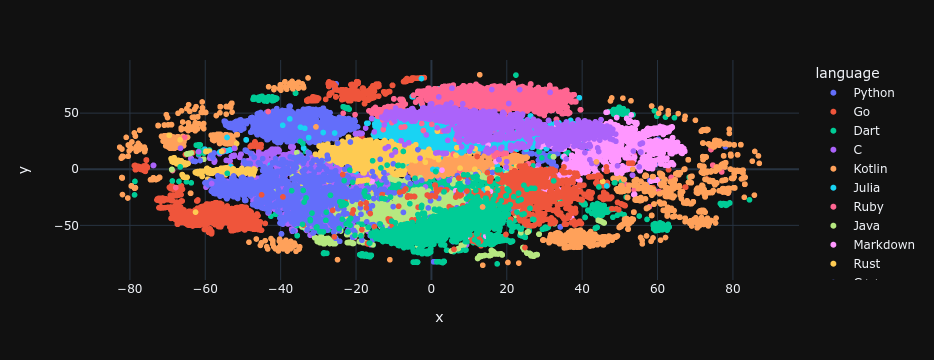

In [64]:
fig_bert = gen_plot(
    df = df_bert,
    vec = np.vstack(df_bert['source_vector']).reshape(-1, 768)
)

fig_bert.show()

In [65]:
with open("../resources/tsne_bert.json", "w") as bert:
    bert.write(fig_bert.to_json())

In [34]:
with open("../resources/tsne_spacy.json", "w") as spcy:
    spcy.write(fig_spacy.to_json())